1. **Motivation**.
- What is your dataset?
- Why did you choose this/these particular dataset(s)?
- What was your goal for the end user's experience?

In [1]:
""" Importing packages """
import folium
import plotly.express as px
import matplotlib.pyplot as plt

# Bokeh
from bokeh.plotting import show
from bokeh.io import show

# Seaborn
import seaborn as sns

# Local
from utils.make_data import get_data, clean_data, get_neighborhoods
from utils.const import FILTER_CALL_TYPES
from utils.plot_functions import (
    make_bokeh_line_plot,
    make_map,
    make_bokeh_tabs,
    make_cal_plot,
)

In [2]:
""" Importing data """
# The raw data
dat_raw = get_data()
# The cleaned data
dat = clean_data(dat_raw)
# The geojason file with the neighborhoods of San Francisco
neighborhoods = get_neighborhoods()

# print the names of the columns of the data
print(dat.columns)

/Users/signy/Documents/DTU/3_vor_2023/social_data_analysis/exercises/socialdataanalysis/utils/make_data.py:67: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv("data/fireIncidents_clean.csv", parse_dates=parse_dates)


Index(['call_number', 'unit_id', 'incident_number', 'call_type', 'call_date',
       'watch_date', 'received_dttm', 'entry_dttm', 'dispatch_dttm',
       'response_dttm', 'on_scene_dttm', 'transport_dttm', 'hospital_dttm',
       'call_final_disposition', 'available_dttm', 'address', 'battalion',
       'station_area', 'als_unit', 'call_type_group', 'number_of_alarms',
       'unit_type', 'unit_sequence', 'neighborhood', 'row_id', 'latitude',
       'longitude', 'hour', 'on_scene_time', 'transport_time'],
      dtype='object')


2. **Basic stats**. Let's understand the dataset better
- Write about your choices in data cleaning and preprocessing
- Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

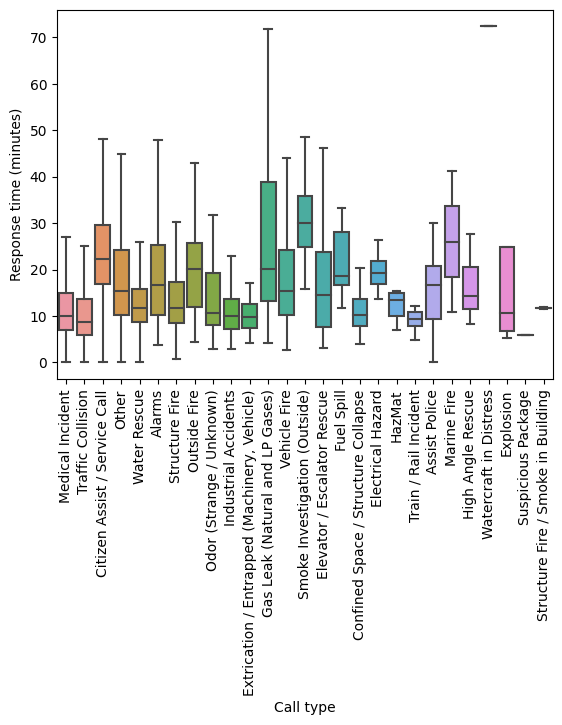

In [3]:
# Average response time by call type
b = sns.boxplot(data = dat, x = "call_type", y = "on_scene_time",showfliers = False)
b.set(xlabel='Call type', ylabel='Response time (minutes)')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show(b)

In [4]:
# filter the data to only include the call types we are interested in
dat_fire = dat[dat["call_type"].isin(FILTER_CALL_TYPES)]

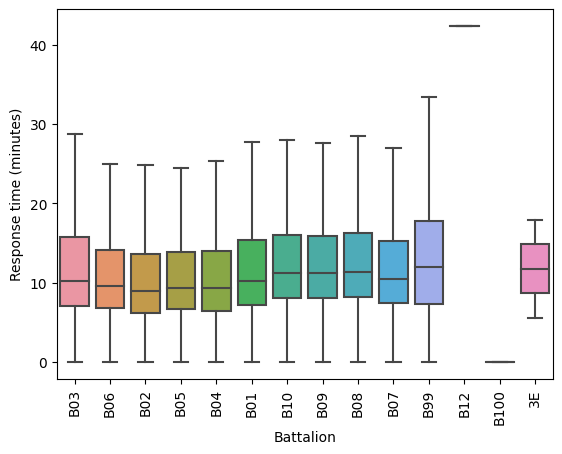

In [6]:
# Average response time by battalion
b = sns.boxplot(data = dat_fire, x = "battalion", y = "on_scene_time",showfliers = False)
b.set(xlabel='Battalion', ylabel='Response time (minutes)')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show(b)

In [ ]:
b = sns.boxplot(data = dat_fire, x = "neighborhood", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

In [ ]:
b = sns.boxplot(data = dat_fire, x = "call_type", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'on_scene_time ~ neighborhood + battalion + call_type'

model = ols(formula, data=dat_fire).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

### Only medical incidents

In [ ]:
dat_med = dat[dat["call_type"] == 'Medical Incident']

In [ ]:
b = sns.boxplot(data = dat_med, x = "neighborhood", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

### Time plots

In [ ]:
dat_fire.columns
dat_fire = dat_fire[dat_fire["neighborhood"].notna()]
dat_fire['Year'] = dat_fire['received_dttm'].dt.year

res = dat_fire.groupby(['neighborhood','Year'])["on_scene_time"].mean().reset_index(name='mean')
processed_dat=res.pivot(index='Year',columns='neighborhood', values='mean').reset_index()
processed_dat=res.pivot(index='Year',columns='neighborhood', values='mean').reset_index()

In [ ]:
pallette = Spectral[11]
#output_file("bokeh_inter.html")
descripts = ['Hayes Valley', 'South of Market', 'Mission', 'Russian Hill',
       'Financial District/South Beach', 'Golden Gate Park', 'Tenderloin',
       'Seacliff', 'Outer Mission', 'Bernal Heights', 'Potrero Hill',
       'Marina', 'Nob Hill', 'Lakeshore', 'Presidio Heights',
       'Lone Mountain/USF', 'Haight Ashbury', 'West of Twin Peaks',
       'Noe Valley', 'Bayview Hunters Point', 'Sunset/Parkside',
       'Chinatown', 'Pacific Heights', 'Portola', 'Mission Bay',
       'Western Addition', 'North Beach', 'Inner Sunset',
       'Oceanview/Merced/Ingleside', 'Twin Peaks', 'Castro/Upper Market',
       'Excelsior', 'Japantown', 'Inner Richmond', 'Treasure Island',
       'Visitacion Valley', 'Presidio', 'Outer Richmond', 'McLaren Park',
       'Glen Park', 'Lincoln Park']

src = ColumnDataSource(processed_dat)
years = [str(i) for i in range(2012,2022)]
p = figure(x_range=years, height=500, width=800, title="Average response time by neighborhood by years",
            toolbar_location=None, tools="hover")

items = [] ### for the custom legend
bar ={} # to store vbars
### here we will do a for loop:
for indx,i in enumerate(descripts):
    ### we will create a vbar for each focuscrime
    bar[i] = p.line(x='Year', y=i, source= src, alpha=0.9,
                    muted_alpha=0.1, width=0.9, line_width=2) 
    items.append((i, [bar[i]]))
    bar[i].visible = True if i==list(descripts)[0] else False
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = [("Year", "@Year"), ("Value", "$y{0}"),]
    #hover.mode = 'mouse'

legend = Legend(items=items, location=(0, 10)) ## figure where to add it
p.add_layout(legend, 'left')
p.legend.click_policy="hide" ### assigns the click policy (you can try to use ''hide')
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Average response time"
p.y_range.only_visible = True
p.y_range.start = 0
p.sizing_mode = 'scale_width'

#bokeh_deepnote_show(p) #displays your plot
show(p)

3. **Data Analysis**
- Describe your data analysis and explain what you've learned about the dataset.
- If relevant, talk about your machine-learning.

4. **Genre**. Which genre of data story did you use?
- Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
- Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?


5. **Visualizations**.
- Explain the visualizations you've chosen.
- Why are they right for the story you want to tell?

6. **Discussion**. Think critically about your creation
- What went well?,
- What is still missing? What could be improved?, Why?


7. **Contributions**. Who did what?
- You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
- It is not OK simply to write "All group members contributed equally".

8. Make sure that you use references when they're needed and follow academic standards.